# fifa analysis: improve recruiting
---

# context
This is an exercise i've created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
#### data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

---
# summary
---

context
problem
assumptions
hypothesis
procedure
observation
conclusion

---
#  recruiting a better team
### problem
The client wants to replace his worst player with a new player of equal skill, who would be willing to work for a lower salary.

### hypothesis
This can be done simply by filtering the current player set to find alternative players.

### assumptions
* replacement players can be from any team.
* replacements must have at least equal skill to the player being replaced.
* the only skill column to be compared is "Overall". 
* replacements must currently earn no more than half of the replaced player's salary.
* replacements need to somehow be capable to play the position of the player being replaced.
* I only need to produce between 5 and 10 replacements.

### procedure
1. pick 1 team to consult for: Real Madrid CF
2. pick the worst player and find all other players that are as good as him,have as good value as him, and are cheaper
3. add a filter by position (this should significantly reduce the available options)
4. scale the solution to all other members of the team
---

# imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
players = pd.read_csv("CompleteDataset_cleaned.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# picking a team
I've decided to first consult for **Real Madrid**. This is one of the most valuable teams, with one of the biggest budgets and most highly paid players. It should be easy to find players who are just as good but earn significantly less. The solution I come up with should be scalable to all teams eventually.

# create basic replacement filter
My first filter is only going to look at numerical values. This should give me a quick sense of what  available options are. 

In [62]:
# find madrid's worst player
madrid = players[players["Club"] == "Real Madrid CF"]
worst_index = madrid["Overall"].argmin()
worst = players.loc[worst_index]

value_replacements = players[
    (players['Overall'] >= worst['Overall']) &
    (players["Value"] >= 20 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF")
]

#we have narrowed it down to 7 players
#but maybe I have faulty reasoning:perhaps value is relative to the other players on your team?
#madrid doesn't need more valuable players because it has plenty of those:I will optimize for skill instead 

skill_replacements = players[
    (players['Overall'] >= 1.2 * worst['Overall']) &
    (players["Value"] >= worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF")
]

#it looks like the value_replacements and the skill_replacements are a similar set of people
#let's do a comparison to confirm that
overlap = set(value_replacements.index).intersection(set(skill_replacements.index))

skill_replacements[skill_replacements.index.isin(overlap)]

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
index,,,,,,,,,,,,,,,,,,,,,
252,Taison,29,https://cdn.sofifa.org/48/18/players/188803.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,21500000.0,...,63.0,55.0,76.0,64.0,81.0,81.0,77.0,82.0,66.0,77.0
253,Marlos,29,https://cdn.sofifa.org/48/18/players/187754.png,Brazil,https://cdn.sofifa.org/flags/54.png,82,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,21500000.0,...,64.0,56.0,77.0,65.0,81.0,81.0,76.0,82.0,68.0,76.0
406,Fred,24,https://cdn.sofifa.org/48/18/players/209297.png,Brazil,https://cdn.sofifa.org/flags/54.png,80,85,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,19500000.0,...,76.0,70.0,79.0,76.0,77.0,79.0,72.0,78.0,77.0,72.0
412,T. Stepanenko,27,https://cdn.sofifa.org/48/18/players/206413.png,Ukraine,https://cdn.sofifa.org/flags/49.png,80,81,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,14000000.0,...,76.0,78.0,75.0,79.0,69.0,70.0,68.0,68.0,76.0,68.0
434,Y. Rakitskyi,27,https://cdn.sofifa.org/48/18/players/195861.png,Ukraine,https://cdn.sofifa.org/flags/49.png,80,82,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,14500000.0,...,78.0,79.0,77.0,80.0,71.0,72.0,69.0,70.0,78.0,69.0
559,Bernard,24,https://cdn.sofifa.org/48/18/players/205525.png,Brazil,https://cdn.sofifa.org/flags/54.png,79,84,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,17000000.0,...,59.0,47.0,72.0,57.0,78.0,79.0,73.0,80.0,62.0,73.0
761,K. Fortounis,24,https://cdn.sofifa.org/48/18/players/203980.png,Greece,https://cdn.sofifa.org/flags/22.png,78,82,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,13500000.0,...,56.0,50.0,72.0,58.0,76.0,76.0,73.0,76.0,60.0,73.0


# improve recommendation based on position

### problem
Recommendations are not filtered by position. Our worst player is a goalkeeper, So clearly a goalkeeper needs to replace him.

### hypothesis
A player can replace another player if there is at least a 50% overlap between their best positions. This is only true if the replacement player has equal or better overall skill. 

### Assumptions
*  if a player has equal or better overall skill,He will be good enough to replace the player in his best position.
* 50% overlap between their best positions will give the manager enough overlap to properly replace the other player.
* to get the most Value out of a player,We need to place him in the position in which he is best.
* it is inappropriate to recommend a replacement whose best position is not The position Being replaced, Even if He may be better at that position and the person he is replacing.  
* While preferred position might be an indicator of where this player usually plays, I assume that best position is a better indicator. When preferred position is also the best position,then it makes no difference whether we search by 1 or the other. However, when preferred position is not the best position, I assume that the player is fielded where he is best, not where he prefers. So searching on best position covers these 2 scenarios.
* the position ratings that are within 1 point of the best ratings are good enough, to account for error.

### procedure
* find the best position rating per player
* Create a list of best positions: find all positions that are at that rating minus 1.
* check the correlation between best position rating and overall: validate That overall skill is a proxy for best position rating.
    * If it isn't, We need To use Best position rating Instead of the overall skill In our filter.
* fill in missing values: if a player does not have a best position, fill in his best position list with his preferred position
* create a filter based on the overlap between the worst player's best positions and all replacement candidate best positions. 
* Validate that a 50% overlap is a good cut off. 
    * Does this kind of filter actually give us Valid replacements By position?
    * Will the other parameters need to be adjusted
* incorporate position skill into replacement filter

In [63]:
position_list = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB',
           'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 
           'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 
            'RS', 'RW', 'RWB', 'ST']

# a player may be equally good at several positions. make a list of all best positions
players['best_position_rating'] = players[position_list].max(axis=1)

def findBestPositions(row):
    return [name for name in position_list if row[name] >= row['best_position_rating'] - 1]

players['best_positions'] = players.apply(findBestPositions, axis=1)

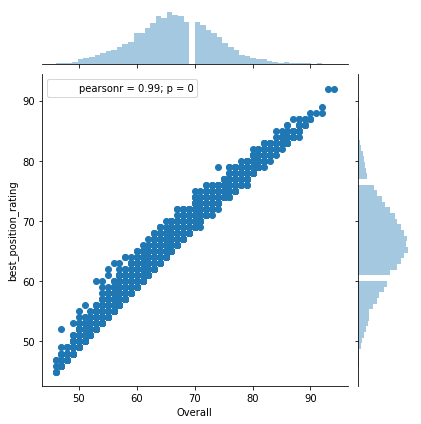

In [64]:
# what is the correlation between Overall and best_position_rating
sns.jointplot(x='Overall',y='best_position_rating',data=players)

# this is a very strong correlation. The Overall field is a good representation of skill.

In [65]:
# fill in missing values: if a player does not have a best position, 
# fill in his best position list with his preferred position

# turn the string of preferred positions into a list
players["preferred_positions"] = players["Preferred Positions"].apply(lambda x: x.split())

def fillBestPositions(row):
    if len(row['best_positions']) > 0:
        return row['best_positions']
    else:
        return row['preferred_positions']

players['best_positions'] = players.apply(fillBestPositions,axis=1)

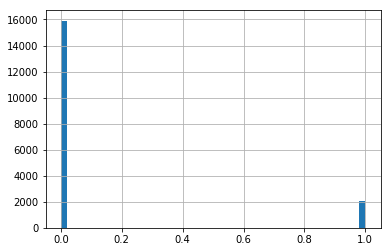

In [66]:
# create a filter that calculates the overlap
# between worst players best positions and all other players
def matchBestPositions(left,right):
    left = set(left)
    right = set(right)
    overlap = left.intersection(right)
    return len(overlap)/len(right)

# find madrid's worst player
worst = players.loc[worst_index]

players['overlap_with_worst'] = players['best_positions']\
        .apply(matchBestPositions,args=(worst['best_positions'],))
    
players['overlap_with_worst'].hist(bins=50)
# because our worst player is a goalkeeper, 
# players either absolutely match him or do not match him at all
# This is not a good test to see if the 50%filter is practical

In [67]:
# combine the position filter with the other filters
replacements = players[
    (players['Overall'] >= 1.1 * worst['Overall']) &
    (players["Value"] >= 10 * worst["Value"]) &
    (players["Wage"]  < 0.5 * worst["Wage"]) &
    (players["Club"] != "Real Madrid CF") &
    (players['overlap_with_worst'] >= .5)
]
replacements
# we need to reduce the other filters to get at least 5 recommendations

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RF,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst
index,,,,,,,,,,,,,,,,,,,,,
680,A. Pyatov,33,https://cdn.sofifa.org/48/18/players/142902.png,Ukraine,https://cdn.sofifa.org/flags/49.png,79,79,Shakhtar Donetsk,https://cdn.sofifa.org/24/18/teams/101059.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
985,S. Kapino,23,https://cdn.sofifa.org/48/18/players/205878.png,Greece,https://cdn.sofifa.org/flags/22.png,77,83,Olympiakos CFP,https://cdn.sofifa.org/24/18/teams/280.png,9000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
1078,I. Khune,30,https://cdn.sofifa.org/48/18/players/165247.png,South Africa,https://cdn.sofifa.org/flags/140.png,77,77,Kaizer Chiefs,https://cdn.sofifa.org/24/18/teams/110929.png,5500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
1253,R. Rey,26,https://cdn.sofifa.org/48/18/players/215069.png,Argentina,https://cdn.sofifa.org/flags/52.png,76,79,PAOK Thessaloniki,https://cdn.sofifa.org/24/18/teams/393.png,6500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0
2180,Yoon Bo Sang,23,https://cdn.sofifa.org/48/18/players/233282.png,Korea Republic,https://cdn.sofifa.org/flags/167.png,74,80,GwangJu FC,https://cdn.sofifa.org/24/18/teams/112258.png,5500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[GK],[GK],1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ab6f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119de3908>]], dtype=object)

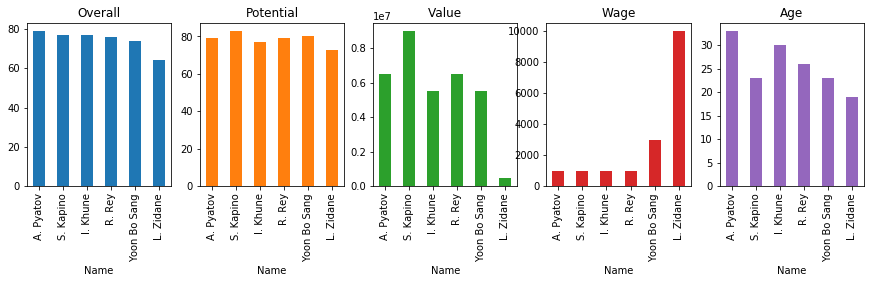

In [92]:
# create visualization to compare differences between replacements and current player

# add the worst player to the comparison
worst = players.loc[worst_index]
comparison = replacements.append(worst)

comparison[['Name','Overall','Potential','Value','Wage','Age']]\
    .plot(x='Name',kind='bar',subplots=True,legend=False,figsize=(15,3),layout=(1,5))


### observations
note that all of these replacements are older than our worst player. is this a hidden indicator that they have less value in the long run? perhaps our player has not reached an age yet where he has much value because he has just started his career.
* what is the correlation between age and value?


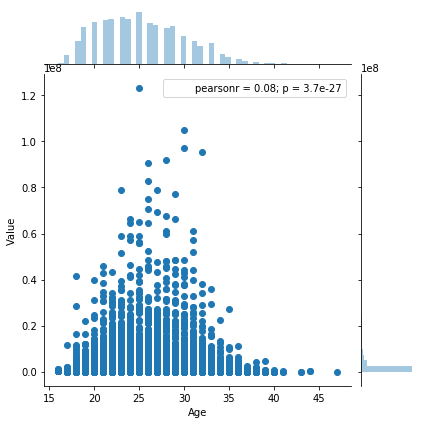

In [93]:
sns.jointplot(x='Age',y='Value',data=players)
# the correlation is very weak
# this is not a good explanation for why the replacements are more valuable

# conclusion
I am not satisfied with these replacement recommendations. The reason being that we take'value' as an important factor. however, I suspect that 'value' depends on how good a player is compared to his teammates. therefore it is a bad indicator of that player's contribution if he moves to a new team. furthermore, a players fan base can affect this. moving to a new team,or to a new country,might ruin this bring the value way down.

These recommendations are good because their overall skill is superior to that of our worst player. however, it is possible that because our worst player is so young, he will become much better, and it is worth holding onto him.

### for further study
note that while the replacements are slightly more skilled then our worst player, our worst player has significantly less value. This makes me question the relationship between value and skill. 
* is value determined by how good you are compared to other players on your team ?
* is value determined by the country you are in?


## Exploration: preferred positions
we have decided that we are just going to use best positions to make recommendations.
However,it is interesting to find out what is the connection between preferred and best positions .
are preferred positions always amongst the best positions?

1. turn the string of preferred positions into a list
2. find out if this list corresponds with the positions for which this player is most skilled
    * is this true for the worst player? 
    * is this true for all players generally?

In [69]:
# turn the string of preferred positions into a list
# players["Preferred Positions"] = players["Preferred Positions"].apply(lambda x: x.split())

# does this list correspond to most skill positions for the worst player?
# it turns out the worst player does not have ratings from his positions

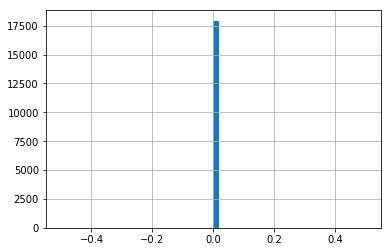

In [70]:
# is preferred position a good indicator for best position?
# TODO: you can modify this to also include information of which that is bigger in the return output
# you could also create a correlation matrix,but this has many more steps
def preferredVersusBest(row):
    preferred = set(row['Preferred Positions'])
    best = set(row['best_positions'])
    overlap = preferred.intersection(best)
    bigger_set = max(len(preferred),len(best))
    return len(overlap)/bigger_set


players.apply(preferredVersusBest, axis=1).hist(bins=50)
# it doesn't look like there is a very strong correlation between preferred and best
# so in my recommendation I will look at best positions,not preferred positions

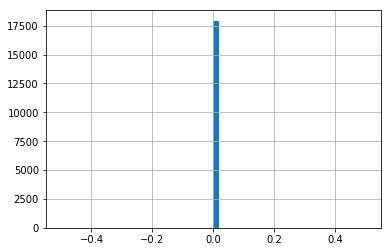

In [71]:
# out of curiosity, I want to find out what is the relationship between preferred and best positions.
# it is too rigorous to require that there be a one-to-one mapping between preferred and best positions.
# to calculate this,I am simply going to see what percentage of preferred positions are amongst best positions
def preferredInBest(row):
    preferred = set(row['Preferred Positions'])
    best = set(row['best_positions'])
    overlap = preferred.intersection(best)
    return len(overlap)/len(preferred)

players['preferred_in_best'] = players.apply(preferredInBest, axis=1)
players['preferred_in_best'].hist(bins=50)

# this is more promising. note that I counted any position that is within 2 of the best

In [72]:
# let's find out how many of the 0 match are due to bad data
players[players['preferred_in_best'] == 0][['Preferred Positions','best_positions']]

# it looks like most of these are goalkeepers. let's assume that if you're a goalkeeper,that is your best position

,Preferred Positions,best_positions
index,,
0,ST LW,"[CF, LF, LS, LW, RF, RS, RW, ST]"
1,RW,"[CAM, CF, LAM, LF, LW, RAM, RF, RW]"
2,LW,"[CAM, CF, LAM, LF, LW, RAM, RF, RW]"
3,ST,"[CAM, CF, LAM, LF, LS, LW, RAM, RF, RS, RW, ST]"
4,GK,[GK]
5,ST,"[CF, LF, LS, RF, RS, ST]"
6,GK,[GK]
7,LW,"[CAM, CF, LAM, LF, LM, LW, RAM, RF, RM, RW]"
8,CDM CM,"[CM, LCM, RCM]"


In [73]:
# for all players who do not have a best position,insert their preferred position as their best position
def fillBestPosition(row):
    if len(row['best_positions']) == 0:
        return row
    else:
        return row['best_positions']

players['best_positions'] = players.apply(fillGoalkeepers, axis=1)

# now rerun the preferred in best check
players['preferred_in_best'] = players.apply(preferredInBest, axis=1)
players['preferred_in_best'].hist(bins=50)

# now we have corrected for all goalkeepers, and for the vast majority of our players, 
# their preferred position is amongst their best positions

NameError: name 'fillGoalkeepers' is not defined

In [ ]:
# check to make sure that every player has a best position
def checkEmptyList(x):
    if len(x) == 0:
        return True
    else:
        return False
    
players[players['best_positions'].apply(checkEmptyList)]



While this exploration was not necessary for making recommendations, gave new insight.
Apparently many players did not have a best position, because they are goalkeepers.
This is a strange situation, goalkeepers are not rated.

either way,this gave us the opportunity to clean up our data, by adding best position data for goalkeepers.

In [ ]:
# now I can add position recommendation to our recruiting

# my premise is that a player is a good replacement if 1 of his best positions
# is also the best position of the person being replaced
# create a filter that checks if any position from 1 list is in the other list
def matchPosition(left_positions,right_positions):
    overlap = set(left_positions).intersection(set(right_positions))
    print(overlap)
    if len(overlap)>0: 
        return True
    else:
        return False

# I will reset the coefficients to see what kind of filtering we get just with position
madrid = players[players["Club"] == "Real Madrid CF"]
worst = madrid.loc[madrid["Overall"].argmin()]

# position_replacements = players[
#     (players['Overall'] >= 1 * worst['Overall']) &
#     (players["Value"] >= 1 * worst["Value"]) &
#     (players["Wage"]  < 0.5 * worst["Wage"]) &
#     (players["Club"] != "Real Madrid CF") &
#     (players['best_positions'].apply(matchPosition,args=(worst['best_positions'])))    
# ]

# position_replacements

In [ ]:
worst

# client recommendation
indeed,we have narrowed our list to 7 recommendations.
* these 7 players are at least 20% better that our player.
* they also provide at least 2000% more value.
* they are also earning at most 50% of our worst players salary.

## next steps
1. make player recommendations based on position
2. rewrite this code so that it can be scaled to any player and parameterized 
3. make recommendations based on age,where younger players are more valuable
4. make recommendations based on geography, where closer players are more valuable
5. take into account a player's  willingness to change teams

## critique

1. your initial goal was to study a player's performance
    * you didn't formulate clear questions: 
        * which metric is the best representation for performance? _overall_
        * which smaller metric is the best predictor for performance?
        * which set of 5 smaller metrics are the best predictors for performance?
    * you didn't make recommendations to your client:
        * should players focus on their best skills or the worst skills to get better performance?
        * which players have the best wage to value ratio?
        * which players have the best wage to overall ratio?
        * who are the weakest players on any given team?
        
2. your secondary goal was to study a team's performance
    * you don't have data on teams winning
    * you didn't study the connection between individual players and team skill
        * what is the best player mix for a good team?
        * what is the best way to predict a team skill based on individual player features?

3. your third goal was to make financial recommendations 
    * which teams have the best wage to value ratios?
    * which teams have the best wage to overall ratios?
    
---

1. each section needs an explicit goal, with steps laid out
2. each section needs an explicit conclusion, that cites the values discovered
3. whenever you learn something from a calculation, you should write that down
4. make your variable names more clear